In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers, callbacks
from keras.layers import Dense, Dropout, BatchNormalization

In [2]:
df = pd.read_csv('Preprocessed Data 3 Mar 2021.csv', index_col = 0)
df.head(5)

,Speed (km/h),Latitude coordinate (degrees),Longitude coordinate (degrees),Altitude (meters),Vertical accuracy (degrees),Horizontal accuracy (degrees),Course (degrees),Difcourse: course variation (degrees),Acceleration in X filtered by KF (Gs),Acceleration in Y filtered by KF (Gs),...,no speed limit,no lanes number,Type of road_motorway,Type of road_motorway_link,Type of road_primary,Type of road_primary_link,Type of road_tertiary_link,AGGRESSIVE,DROWSY,NORMAL
0,64.5,40.512924,-3.404577,612.5,4,5,331.9,0.000,-0.030,-0.015,...,0,0,0,0,0,0,0,0,0,1
1,63.6,40.513065,-3.404680,612.9,4,5,330.8,1.055,0.026,-0.012,...,0,0,0,0,0,0,0,0,0,1
2,62.2,40.513210,-3.404772,613.3,4,5,330.8,1.055,-0.021,-0.018,...,0,0,0,0,0,0,0,0,0,1
3,60.9,40.513348,-3.404868,613.5,3,5,330.1,0.703,0.025,0.006,...,0,0,0,0,0,0,0,0,0,1
4,61.2,40.513477,-3.404971,613.8,3,5,329.4,1.406,0.014,-0.031,...,0,0,0,0,0,0,0,0,0,1


In [3]:
X = df.iloc[:,:-3]
Y = df.iloc[:,-3:]
kf = KFold(n_splits=5, random_state=4, shuffle=True)

In [4]:
early_stopping = callbacks.EarlyStopping(
    patience=50, # how many epochs to wait before stopping
    restore_best_weights=True)

model = keras.Sequential()
model.add(Dense(100, activation='relu', input_shape=[X.shape[1]]))
model.add(Dropout(0.0009))
model.add(BatchNormalization())

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.0009))
model.add(BatchNormalization())

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.0009))
model.add(BatchNormalization())

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.0005))
model.add(BatchNormalization())

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.0001))
model.add(BatchNormalization())

model.add(Dense(Y.shape[1], activation='softmax'))

optimizer = keras.optimizers.Adam()

model.compile(optimizer=optimizer,
             loss=['categorical_crossentropy'],
             metrics = ['accuracy'])

model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,163 (110.01 KB)

 Trainable params: 27,483 (107.36 KB)

 Non-trainable params: 680 (2.66 KB)

In [5]:
count = 0

for train_index, test_index in kf.split(X):
    print('Fold: ' + str(count))

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=40)

    model = keras.Sequential()
    model.add(Dense(100, activation='relu', input_shape=[X.shape[1]]))
    model.add(Dropout(0.001))
    model.add(BatchNormalization())

    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.001))
    model.add(BatchNormalization())

    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.001))
    model.add(BatchNormalization())

    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.00055))
    model.add(BatchNormalization())

    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.00015))
    model.add(BatchNormalization())

    model.add(Dense(Y.shape[1], activation='softmax'))

    optimizer = keras.optimizers.Adam()

    model.compile(optimizer=optimizer,
                 loss=['categorical_crossentropy'],
                 metrics = ['accuracy',tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

    model.summary()
    
    history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test), 
                    #batch_size = 22,
                    callbacks=[early_stopping],
                    epochs=600)
    
    if count == 0:
        history_fold_0 = pd.DataFrame(history.history)
    elif count == 1:
        history_fold_1 = pd.DataFrame(history.history)
    elif count == 2:
        history_fold_2 = pd.DataFrame(history.history)
    elif count == 3:
        history_fold_3 = pd.DataFrame(history.history)
    elif count == 4:
        history_fold_4 = pd.DataFrame(history.history)
    
    count += 1

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels from one-hot encoding to class labels if necessary
y_true_classes = np.argmax(Y_test, axis=1)

# Calculate and display precision, recall, and F1-score for each class
print("Evaluation Metrics Per Class:")
print(classification_report(y_true_classes, y_pred_classes, target_names=['Class 1', 'Class 2', 'Class 3']))

Fold: 0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,163 (110.01 KB)

 Trainable params: 27,483 (107.36 KB)

 Non-trainable params: 680 (2.66 KB)

Epoch 1/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5807 - loss: 0.8905 - precision: 0.6237 - recall: 0.4813 - val_accuracy: 0.6854 - val_loss: 0.6811 - val_precision: 0.7185 - val_recall: 0.6493
Epoch 2/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - accuracy: 0.7298 - loss: 0.5990 - precision: 0.7646 - recall: 0.6827 - val_accuracy: 0.7900 - val_loss: 0.4718 - val_precision: 0.8204 - val_recall: 0.7520
Epoch 3/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - accuracy: 0.7816 - loss: 0.5092 - precision: 0.8099 - recall: 0.7465 - val_accuracy: 0.7874 - val_loss: 0.4785 - val_precision: 0.8166 - val_recall: 0.7552
Epoch 4/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - accuracy: 0.8029 - loss: 0.4603 - precision: 0.8236 - recall: 0.7758 - val_accuracy: 0.8595 - val_loss: 0.3452 - val_precision: 0.8742 - val_recall: 0.8378
Epoch 5/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - accuracy: 0.8283 - loss: 0.4067 - precision: 0.8477 - recall: 0.8079 - val_accuracy: 0.8443 -

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,163 (110.01 KB)

 Trainable params: 27,483 (107.36 KB)

 Non-trainable params: 680 (2.66 KB)

Epoch 1/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5851 - loss: 0.8690 - precision: 0.6513 - recall: 0.4698 - val_accuracy: 0.6786 - val_loss: 0.6829 - val_precision: 0.7182 - val_recall: 0.6280
Epoch 2/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - accuracy: 0.7404 - loss: 0.5808 - precision: 0.7758 - recall: 0.6914 - val_accuracy: 0.8009 - val_loss: 0.4590 - val_precision: 0.8283 - val_recall: 0.7676
Epoch 3/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - accuracy: 0.7907 - loss: 0.4809 - precision: 0.8167 - recall: 0.7617 - val_accuracy: 0.8116 - val_loss: 0.4236 - val_precision: 0.8283 - val_recall: 0.7923
Epoch 4/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.8173 - loss: 0.4233 - precision: 0.8360 - recall: 0.7962 - val_accuracy: 0.8012 - val_loss: 0.4595 - val_precision: 0.8146 - val_recall: 0.7866
Epoch 5/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - accuracy: 0.8366 - loss: 0.3959 - precision: 0.8506 - recall: 0.8185 - val_accuracy: 0.8102 -

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,163 (110.01 KB)

 Trainable params: 27,483 (107.36 KB)

 Non-trainable params: 680 (2.66 KB)

Epoch 1/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5866 - loss: 0.8639 - precision: 0.6423 - recall: 0.4710 - val_accuracy: 0.7167 - val_loss: 0.6101 - val_precision: 0.7537 - val_recall: 0.6661
Epoch 2/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - accuracy: 0.7354 - loss: 0.5915 - precision: 0.7687 - recall: 0.6865 - val_accuracy: 0.7576 - val_loss: 0.5175 - val_precision: 0.7829 - val_recall: 0.7326
Epoch 3/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.7788 - loss: 0.5072 - precision: 0.8052 - recall: 0.7459 - val_accuracy: 0.7938 - val_loss: 0.4674 - val_precision: 0.8185 - val_recall: 0.7695
Epoch 4/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.8124 - loss: 0.4364 - precision: 0.8348 - recall: 0.7888 - val_accuracy: 0.7812 - val_loss: 0.4958 - val_precision: 0.8035 - val_recall: 0.7542
Epoch 5/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - accuracy: 0.8330 - loss: 0.3974 - precision: 0.8514 - recall: 0.8124 - val_accuracy: 0.8609 -

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,163 (110.01 KB)

 Trainable params: 27,483 (107.36 KB)

 Non-trainable params: 680 (2.66 KB)

Epoch 1/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5685 - loss: 0.8909 - precision: 0.6222 - recall: 0.4604 - val_accuracy: 0.7154 - val_loss: 0.6165 - val_precision: 0.7491 - val_recall: 0.6648
Epoch 2/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.7346 - loss: 0.5927 - precision: 0.7657 - recall: 0.6877 - val_accuracy: 0.7645 - val_loss: 0.5223 - val_precision: 0.7951 - val_recall: 0.7259
Epoch 3/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - accuracy: 0.7810 - loss: 0.4981 - precision: 0.8089 - recall: 0.7496 - val_accuracy: 0.8043 - val_loss: 0.4381 - val_precision: 0.8217 - val_recall: 0.7835
Epoch 4/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - accuracy: 0.8114 - loss: 0.4398 - precision: 0.8295 - recall: 0.7877 - val_accuracy: 0.8169 - val_loss: 0.4149 - val_precision: 0.8331 - val_recall: 0.8006
Epoch 5/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.8371 - loss: 0.3866 - precision: 0.8546 - recall: 0.8190 - val_accuracy: 0.8227 -

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,163 (110.01 KB)

 Trainable params: 27,483 (107.36 KB)

 Non-trainable params: 680 (2.66 KB)

Epoch 1/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5696 - loss: 0.9060 - precision: 0.6232 - recall: 0.4468 - val_accuracy: 0.7235 - val_loss: 0.6151 - val_precision: 0.7633 - val_recall: 0.6688
Epoch 2/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.7424 - loss: 0.5822 - precision: 0.7785 - recall: 0.6998 - val_accuracy: 0.7632 - val_loss: 0.5344 - val_precision: 0.7918 - val_recall: 0.7342
Epoch 3/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.7852 - loss: 0.4927 - precision: 0.8132 - recall: 0.7557 - val_accuracy: 0.8040 - val_loss: 0.4677 - val_precision: 0.8258 - val_recall: 0.7806
Epoch 4/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.8234 - loss: 0.4224 - precision: 0.8426 - recall: 0.8019 - val_accuracy: 0.8043 - val_loss: 0.4393 - val_precision: 0.8230 - val_recall: 0.7876
Epoch 5/600
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.8362 - loss: 0.3956 - precision: 0.8520 - recall: 0.8158 - val_accuracy: 0.8608 -

In [6]:
precision = history.history['val_precision'][-1]  
recall = history.history['val_recall'][-1] 
f1_score = 2 * (precision * recall) / (precision + recall)
print(f1_score, precision, recall)

0.9765739480469828 0.9767328500747681 0.9764150977134705


In [7]:
final_result = pd.concat([history_fold_0[-1:],
                          history_fold_1[-1:],
                          history_fold_2[-1:],
                          history_fold_3[-1:],
                          history_fold_4[-1:],
                         ])
final_result.columns = ['Last Training Accuracy', 'Last Training Loss (Crossentropy)','training precision','training recall', 'Last Validation Accuracy', 'Last Validation Loss (Crossentropy)','validation precision','validation recall']
final_result = final_result.reset_index(drop = True)
final_result.index += 1 
final_result.index.name = 'Fold'
final_result['Last Training Accuracy'] *= 100
final_result['Last Validation Accuracy'] *= 100
final_result['Last Training Loss (Crossentropy)'] = final_result['Last Training Loss (Crossentropy)'].round(5)
final_result['Last Validation Loss (Crossentropy)'] = final_result['Last Validation Loss (Crossentropy)'].round(5)
final_result['Last Training Accuracy'] = final_result['Last Training Accuracy'].round(2)
final_result['Last Validation Accuracy'] = final_result['Last Validation Accuracy'].round(2)

final_result

,Last Training Accuracy,Last Training Loss (Crossentropy),training precision,training recall,Last Validation Accuracy,Last Validation Loss (Crossentropy),validation precision,validation recall
Fold,,,,,,,,
1,98.00,0.05574,0.980025,0.979587,97.15,0.09457,0.971680,0.971048
2,98.06,0.05509,0.980956,0.980278,97.80,0.08474,0.978042,0.978042
3,98.31,0.04704,0.983560,0.982840,97.97,0.06975,0.979821,0.979343
4,97.89,0.05823,0.979444,0.978448,97.93,0.07281,0.979499,0.979180
5,97.89,0.05692,0.979368,0.978611,97.66,0.08247,0.976733,0.976415


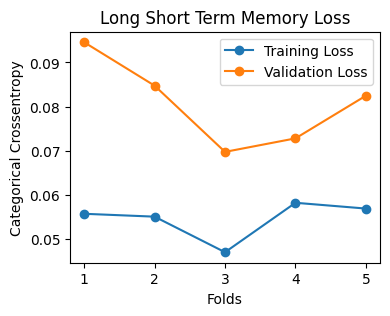

In [8]:
plt.figure(figsize = [4,3])
plt.plot(final_result.loc[:, ['Last Training Loss (Crossentropy)', 'Last Validation Loss (Crossentropy)']],'o-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Long Short Term Memory Loss')
plt.xticks(np.arange(1,6,1))
plt.xlabel('Folds')
plt.ylabel('Categorical Crossentropy')
plt.show()

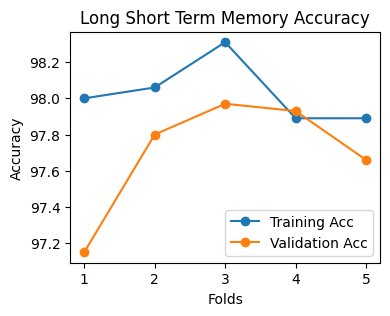

In [9]:
plt.figure(figsize = [4,3])
plt.plot(final_result.loc[:, ['Last Training Accuracy', 'Last Validation Accuracy']],'o-')
plt.legend(['Training Acc', 'Validation Acc'])
plt.title('Long Short Term Memory Accuracy')
plt.xticks(np.arange(1, 6, 1))
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.show()

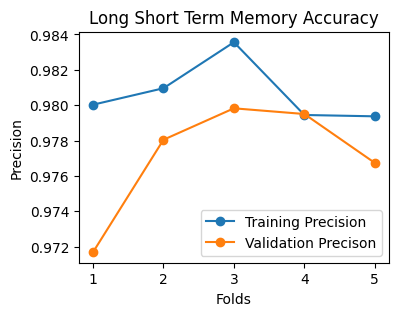

In [10]:
plt.figure(figsize = [4,3])
plt.plot(final_result.loc[:, ['training precision', 'validation precision']],'o-')
plt.legend(['Training Precision', 'Validation Precison'])
plt.title('Long Short Term Memory Accuracy')
plt.xticks(np.arange(1, 6, 1))
plt.xlabel('Folds')
plt.ylabel('Precision')
plt.show()

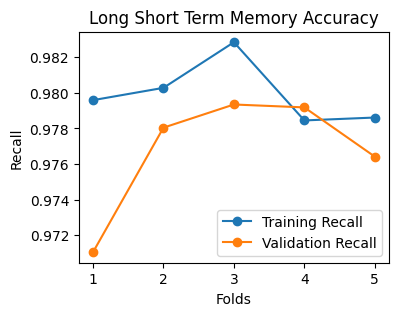

In [11]:
plt.figure(figsize = [4,3])
plt.plot(final_result.loc[:, ['training recall', 'validation recall']],'o-')
plt.legend(['Training Recall', 'Validation Recall'])
plt.title('Long Short Term Memory Accuracy')
plt.xticks(np.arange(1, 6, 1))
plt.xlabel('Folds')
plt.ylabel('Recall')
plt.show()

In [12]:
average_validation_accuracy = final_result['Last Validation Accuracy'].mean()

print(f"The average validation accuracy is: {average_validation_accuracy}%")

The average validation accuracy is: 97.702%
